1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

np.random.seed(57917)

def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 1170828

def p (time, tau):
    return 1-2**(-time/tau)

#for esponential behaviour
#def p (time, tau):
#    return 0.1

# comulative = 1-2**(-r/tau)
def inv(r,tau):
    return -tau*np.log2(1-r)

First approach


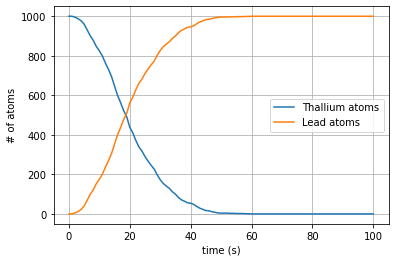

Second approach


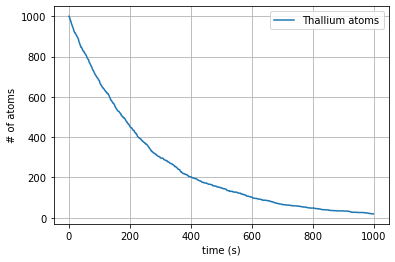

In [2]:
print("First approach")

Tl = 1000
Pb = 0
tau = 183.12
time = 0
step = 1
N = 100

v_Tl = []
v_Pb = []
v_time = []

v_Tl.append(Tl)
v_Pb.append(Pb)
v_time.append(time)

for i in range(0,N):
    for j in range(0,Tl):
        if (lcg()<p(time,tau)):
            Tl -= 1
            Pb += 1
    time += step
    v_Tl.append(Tl)
    v_Pb.append(Pb)
    v_time.append(time)

plt.grid()
plt.ylabel("# of atoms")
plt.xlabel("time (s)") 
plt.plot(v_time, v_Tl,label="Thallium atoms")
plt.plot(v_time, v_Pb,label="Lead atoms")
plt.legend()
plt.show()


print("Second approach")

v_ran = [lcg() for i in range(1000)]
times = []
not_dec = []
x = []

for i in v_ran:
    times.append(inv(i, tau))

for i in range(0,1000,1):
    count=0
    for time in times:
        if(time>i): count += 1
    not_dec.append(count)
    x.append(i)
    
plt.grid()
plt.ylabel("# of atoms")
plt.xlabel("time (s)") 
plt.plot(x, not_dec,label="Thallium atoms")
plt.legend()
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
ev=1.609 * 10**(-19)

N=10**6
Z=79
E=7.7*10**6*ev
e0 = 8.854 * 10.**(-12)
a0 = 5.292 * 10.**(-11)

b_soglia = Z*ev*ev/(2*np.tan(np.pi/4)*np.pi*e0*E)

x_beam = np.random.normal(0,a0/100.,N)
y_beam = np.random.normal(0,a0/100.,N)

count=0

for i in range(0,N-1):
    if( np.sqrt(x_beam[i]**2 + y_beam[i]**2 ) < b_soglia): count += 1
        
print("Fraction of bouncing back particles:", 100*count/N, "%")

Fraction of bouncing back particles: 0.1629 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
def f (x):
    return (np.sin(1./(x*(2.-x))))**2

def sigma(vect,N):
    return 2*np.sqrt(np.var(vect)/N)

In [5]:
#f is strictly positive and between 0 and 1
N = 5*10**5
count = 0
vect = []

for i in range(0,N):
    r = lcg()
    vect.append(f(r))
    x = 0+lcg()*2
    if (r<f(x)): count += 1
        
print("hit/miss method integral =",count*2*1/N)
print("error method =", sigma(vect,N))

hit/miss method integral = 1.450712
error method = 0.0007451249980327107


In [6]:
N = 10**6
h = 2/N
integ = 0

for i in range(1,N):
    vect.append(f(i*h))
    integ += f(i*h)

print("mean value method integral =",integ*2*1/N)

print("error method =", sigma(vect,N) )

mean value method integral = 1.4514250741822379
error method = 0.0005270303434657133


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
def n_dim_sphere(n_dim, n_samples):
    v = []
    
    for i in range(0,n_dim):
        s = [lcg() for i in range(n_samples)]
        v.append(s)
      
    count = 0
    
    for i in range (0,n_samples):
        f=0
        for dim in v:
            f += dim[i]**2
        
        if (np.sqrt(f)<1): count += 1
        
    print("hit/miss method integral for unit sphere in", n_dim, "dimensions =",count*2**n_dim/n_samples)

In [8]:
n_dim_sphere(2, 10**6)
n_dim_sphere(3, 10**6)
n_dim_sphere(10, 2*10**6)

hit/miss method integral for unit sphere in 2 dimensions = 3.141216
hit/miss method integral for unit sphere in 3 dimensions = 4.194096
hit/miss method integral for unit sphere in 10 dimensions = 2.6148864


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
def f(x):
    return (x**(-0.5)/(np.e**x+1))

def w(x):
    return (x**(-0.5))

#inversa della cumulativa
def inv(x):
    return (x**2)

In [16]:
N = 10**6

integ = 0
integ_w = 2

vect = []

for i in range(1,N):
    r = lcg()
    x = inv(r)
    vect.append(x)
    integ += f(x)/w(x)

print("Importance sampling method integral =",integ*integ_w/N)
print("error method =", sigma(vect,N) )

Importance sampling method integral = 0.8387156868157652
error method = 0.000596591298749924
